---
title: "US Treasury Bond Web Scrapper"
author: "Samantha Pang"
date: "Oct 2025"
jupyter: python3
execute:
  cache: true
---

## Preview
* collecting data via Beautiful Soup (web scraper)
* Data source: [U.S. Department of the Treasury](https://home.treasury.gov/policy-issues/financing-the-government/interest-rate-statistics)
* Initial ETL
* Review Data Structure & Distribution

## Let's Get Started!
This analysis is performed using Python in a Jupyter Notebook environment.
Make sure you have the following libraries installed:
* pandas
* datetime
* numpy
* requests
* matplotlib
* beautifulsoup4
* seaborn

### Review URL
Recently, I stumbled upon a government website that lists daily Treasury rates by year and maturity. I noticed that the data could be accessed simply by changing the last four digits of the URL, so I built a scraper to pull every year’s data from 1990 all the way to today.

Try it yourself, change "xxxx" to the desired year: 
 https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=xxxx

### Inspecting HTML
Use the latest URL (current year) to inspect the HTML table structure: headings and rows. You’ll notice there are 26 headings. The heading text looks clean, so we can store them to generate a DataFrame later.
Within the table rows, there’s quite a bit of blank space in each cell, which is represented as text 'N/A'. We’ll need to clean that up shortly.

In [1]:
from bs4 import BeautifulSoup as BS
import requests as req
import datetime
import pandas as pd
import numpy as np

urls=[]
url = "https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=xxxx"

start_year = 1990
end_year = datetime.date.today().year

years = [str(yr) for yr in range(start_year, end_year+1)]

for year in years:
    urls.append(url.replace('xxxx', year))

# inspect the last URL to get the table headings
html_text = req.get(urls[-1]).text
soup=BS(html_text, 'html.parser')

print('Scrapping from website:', soup.title.text)
print(f'This script is to scrape US Treasury Rate data from {start_year} to {end_year}.')

# table = soup.find_all('tr') 

# column headings
headings = []
for item in soup.find_all('th'):
    headings.append(item.text)
print('Table headings <th>:', headings)
print('Number of headings:', len(headings))

# data rows
all_rows = []
for item in soup.find_all('td'):
    all_rows.append(item.text)
print('Table data <td>:', all_rows[:26])

Scrapping from website: Resource Center | U.S. Department of the Treasury
This script is to scrape US Treasury Rate data from 1990 to 2025.
Table headings <th>: ['Date', '20 YR', '30 YR', 'Extrapolation Factor', '6 WEEKS BANK DISCOUNT', 'COUPON EQUIVALENT', '8 WEEKS BANK DISCOUNT', 'COUPON EQUIVALENT', '17 WEEKS BANK DISCOUNT', 'COUPON EQUIVALENT', '52 WEEKS BANK DISCOUNT', ' COUPON EQUIVALENT', '1 Mo', '1.5 Mo', '2 Mo', '3 Mo', '4 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr']
Number of headings: 26
Table data <td>: ['01/02/2025\n', 'N/A          ', 'N/A          ', 'N/A          ', 'N/A          ', 'N/A          ', 'N/A          ', 'N/A          ', 'N/A          ', 'N/A          ', 'N/A          ', 'N/A          ', '4.45          ', 'N/A          ', '4.36          ', '4.36          ', '4.31          ', '4.25          ', '4.17          ', '4.25          ', '4.29          ', '4.38          ', '4.47          ', '4.57          ', '4.86          ', '4.79  

After reviewing the table structure, we can iterate through all the URLs to extract the complete dataset. All data is stored in a dataframe and exported as a CSV file for further analysis.

In [2]:
# now scrape all the table data/ td from all the URLs
all_rows = []
for url in urls:
    html_text = req.get(url).text
    soup = BS(html_text, 'html.parser')
    table_rows = soup.find_all('tr')               
    for tr in table_rows[1:]:
        td = tr.find_all('td')
        row=[i.text.strip('\n') for i in td]       #i is each td element, i.text is to find all text in that i, .strip to remove entries starts with \n
        all_rows.append(row)
df=pd.DataFrame(data=all_rows, columns=headings)
df.to_csv('raw_US_Treasury_Rates.csv', index=False)
df.head()

,Date,20 YR,30 YR,Extrapolation Factor,6 WEEKS BANK DISCOUNT,COUPON EQUIVALENT,8 WEEKS BANK DISCOUNT,COUPON EQUIVALENT,17 WEEKS BANK DISCOUNT,COUPON EQUIVALENT,...,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,01/02/1990,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,...,N/A,7.89,7.81,7.87,7.90,7.87,7.98,7.94,N/A,8.00
1,01/03/1990,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,...,N/A,7.94,7.85,7.94,7.96,7.92,8.04,7.99,N/A,8.04
2,01/04/1990,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,...,N/A,7.90,7.82,7.92,7.93,7.91,8.02,7.98,N/A,8.04
3,01/05/1990,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,...,N/A,7.85,7.79,7.90,7.94,7.92,8.03,7.99,N/A,8.06
4,01/08/1990,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,...,N/A,7.88,7.81,7.90,7.95,7.92,8.05,8.02,N/A,8.09


### Reviewing and Cleaning the Dataframe

Inspecting dataframe via `df.describe()`, `df.info()` and `df.head()`. There are a few things to clean up:

1. Remove leading and trailing spaces
2. Replace all 'N/A' with NaN
3. Drop columns with all NaN values
4. convert the 'Date' column to datetime format
5. convert the rest of the columns to float

In [4]:
# remove all blank spaces in the dataframe, except headers
clean_df = df.iloc[:,:].map(lambda x:x.strip())
# converting to lower case, if cell equals to 'n/a', then replace with empty string
clean_df = clean_df.map(lambda x:np.nan if (x.lower() == 'n/a' or x =='') else x)
# dropping all columns with all NaN values
clean_df.dropna(axis=1, how='all', inplace=True)
# change Date column to datetime and the rest to float
clean_df[clean_df.columns[0]] = pd.to_datetime(clean_df[clean_df.columns[0]])
for col in clean_df.columns[1:]:
    clean_df[col] = clean_df[col].astype(str).astype(float)
clean_df.to_csv('clean_US_Treasury_Rates.csv', index=False)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8960 entries, 0 to 8959
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    8960 non-null   datetime64[ns]
 1   1 Mo    6060 non-null   float64       
 2   1.5 Mo  172 non-null    float64       
 3   2 Mo    1755 non-null   float64       
 4   3 Mo    8956 non-null   float64       
 5   4 Mo    753 non-null    float64       
 6   6 Mo    8959 non-null   float64       
 7   1 Yr    8959 non-null   float64       
 8   2 Yr    8959 non-null   float64       
 9   3 Yr    8959 non-null   float64       
 10  5 Yr    8959 non-null   float64       
 11  7 Yr    8959 non-null   float64       
 12  10 Yr   8959 non-null   float64       
 13  20 Yr   8020 non-null   float64       
 14  30 Yr   7965 non-null   float64       
dtypes: datetime64[ns](1), float64(14)
memory usage: 1.0 MB


##### All done! Ready for analysis.
## Initial observations
### I choose you, Seaborn and Matplotlib!

Utilizing seaborn and matplotlib, we can visualize the trends and distribution in the U.S. Treasury Par Yield Curve Rates over time.

### Data Distribution

[Text(0, 0.5, '')]

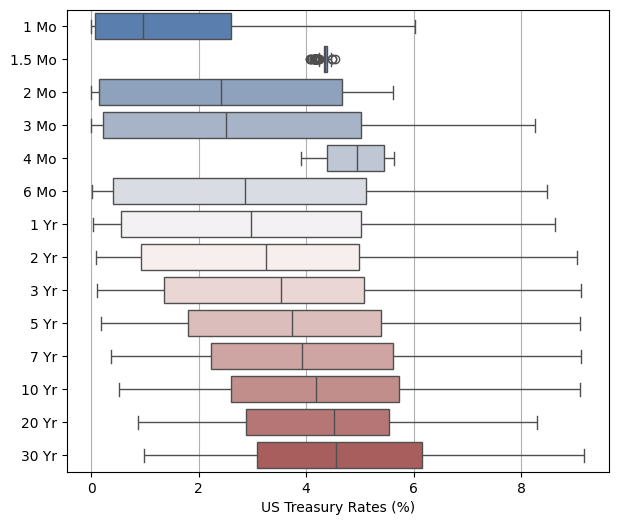

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt df to long format
data = clean_df.melt(id_vars='Date', var_name='Series', value_name='Value')
data.dropna(inplace=True)

f, ax = plt.subplots(figsize=(7, 6))
# Plot the orbital period with horizontal boxes, vlag - blue/pink diverging color palette
sns.boxplot(
    data, x="Value", y="Series", hue="Series", palette="vlag"
)

ax.set_xlabel("US Treasury Rates (%)")
ax.xaxis.grid(True)
ax.set(ylabel="")

Box plots allows us to view the distribution of rates for each maturity period.
We can also observe that the short term rates has generally a lower rate than the long term rates, which is expected.

1.5Mo and 4Mo maturity rate have significantly smaller range of data. Upon review, it appears that the 1.5Mo and 4Mo maturity rates were only added to the dataset in recent years, which has less data points compared to other rates. 

### Trends Over Time

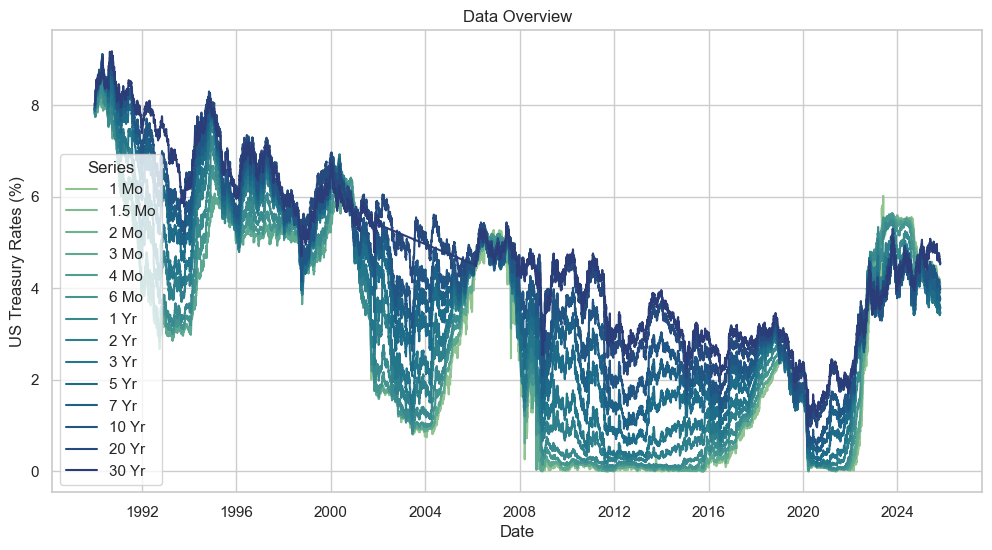

In [6]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Date', y='Value', hue='Series', palette='crest')
plt.title("Data Overview")
plt.ylabel("US Treasury Rates (%)")
# plt.
plt.show()

The line chart below shows the trends of different maturity rates from 1990 to 2024 are generally trending down. Unexpected upward spikes starting around 2021, likely due to economic recovery post-pandemic.

Moreover, the short-term rates (1 month, 3 month, 6 month, 1 year) are more volatile, while the long-term rates (10 year, 20 year, 30 year) are more stable. There are a few period that the short-term rates spike above the long-term rates, indicating an inverted yield curve, which we will explore this further in the next analysis notebook.